# Assigning Wildfire Hazard Potential to CDPs using Zonal Statistics


In [2]:
import geopandas as gpd

In [3]:
import rasterio as rio

In [4]:
import rasterstats as rs

In [5]:
from rasterio.plot import show

In [6]:
import matplotlib.pyplot as plt

In [37]:
import pandas as pd

In [7]:
# read the CDPs shapefile
cdps = gpd.read_file(r"C:\NewMapsPlus\Map698\us-communities-fire\data\cb_2020_us_place_500k.shp")

<AxesSubplot:>

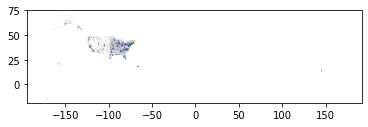

In [10]:
# plot real quick
cdps.plot()

In [15]:
# import the wildfire hzard raster
whp = rio.open(r"C:\NewMapsPlus\Map698\us-communities-fire\data\whp2020_cls_conus.tif")

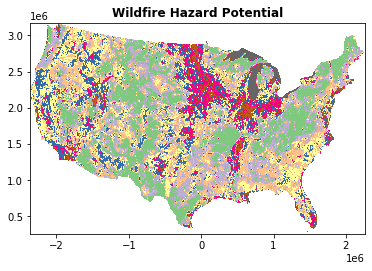

<AxesSubplot:title={'center':'Wildfire Hazard Potential'}>

In [15]:
# plot the raster
show(whp, cmap='Accent', title='Wildfire Hazard Potential')

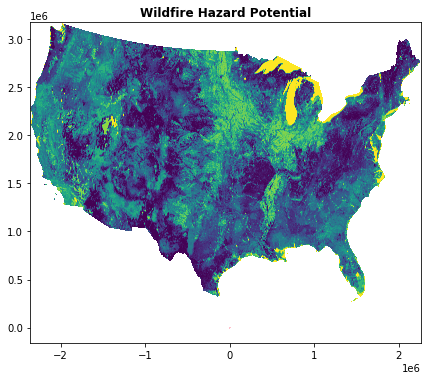

In [27]:
# plot raster and shapefile together
fig, ax = plt.subplots(1,1, figsize = (7,7))
show(whp, ax = ax, title = 'Wildfire Hazard Potential')
cdps.plot(ax = ax, facecolor = 'white', edgecolor = 'pink')
plt.show()

In [9]:
# get general metadata for raster
whp.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 255.0,
 'width': 17132,
 'height': 10803,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["NAD_1983_Albers",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(270.0, 0.0, -2361825.000000001,
        0.0, -270.0, 3175604.999999998)}

In [10]:
# get metadata for shapefile
cdps.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32188 entries, 0 to 32187
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP     32188 non-null  object  
 1   PLACEFP     32188 non-null  object  
 2   PLACENS     32188 non-null  object  
 3   AFFGEOID    32188 non-null  object  
 4   GEOID       32188 non-null  object  
 5   NAME        32188 non-null  object  
 6   NAMELSAD    32188 non-null  object  
 7   STUSPS      32188 non-null  object  
 8   STATE_NAME  32188 non-null  object  
 9   LSAD        32188 non-null  object  
 10  ALAND       32188 non-null  int64   
 11  AWATER      32188 non-null  int64   
 12  Acres       32188 non-null  float64 
 13  geometry    32188 non-null  geometry
dtypes: float64(1), geometry(1), int64(2), object(10)
memory usage: 3.4+ MB


In [11]:
whp.crs

CRS.from_wkt('PROJCS["NAD_1983_Albers",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [12]:
cdps.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [32]:
# project cdps to same CRS as whp
cdps = cdps.to_crs(crs=whp.crs)

In [33]:
# assign raster values to numpy and nd array
whp_array = whp.read(1)
affine = whp.transform

In [36]:
# calculate zonal statistics
majority_whp = rs.zonal_stats(cdps, whp_array, affine = affine, stats=['majority'], geojson_out = True)

In [35]:
# view zonal statistics results
print(majority_whp)

[{'majority': 1.0}, {'majority': 3.0}, {'majority': 1.0}, {'majority': 6.0}, {'majority': 6.0}, {'majority': 3.0}, {'majority': 6.0}, {'majority': 6.0}, {'majority': 6.0}, {'majority': 6.0}, {'majority': 6.0}, {'majority': 6.0}, {'majority': 1.0}, {'majority': 1.0}, {'majority': 6.0}, {'majority': 6.0}, {'majority': 1.0}, {'majority': 1.0}, {'majority': 6.0}, {'majority': 6.0}, {'majority': 1.0}, {'majority': 1.0}, {'majority': 6.0}, {'majority': 6.0}, {'majority': 6.0}, {'majority': 1.0}, {'majority': 6.0}, {'majority': 6.0}, {'majority': 6.0}, {'majority': 6.0}, {'majority': 6.0}, {'majority': 6.0}, {'majority': 6.0}, {'majority': 1.0}, {'majority': 1.0}, {'majority': 1.0}, {'majority': 1.0}, {'majority': 6.0}, {'majority': 6.0}, {'majority': 1.0}, {'majority': 6.0}, {'majority': 3.0}, {'majority': 6.0}, {'majority': 6.0}, {'majority': 6.0}, {'majority': 1.0}, {'majority': 6.0}, {'majority': 1.0}, {'majority': 1.0}, {'majority': 6.0}, {'majority': 6.0}, {'majority': 6.0}, {'majority'

In [ ]:
# Extract majority  from the list
whp_cdps = 